Master TSI - Méthodes avancées en TSI - 6 mars 2020

# TP1 : A la découverte des ondelettes

## 1. Téléchargements et compte-rendu
### 1.1 Téléchargements
Tous les téléchargements se font sur Ametice.

### 1.2. Rendu du TP

Un compte rendu vous est demandé en deux parties :
<ul>
<li> le IPtyhon notebook ci-dessous rempli (format .ipynb)</li>
<li> un ficher pdf formé à partir du notebook ci-dessus (onglet File puis Download as)</li>
</ul>

Les deux sont à rendre via Ametice le <b>lundi 9 mars à midi</b>. Le nom des fichiers devra obligatoirement comporter votre nom. Tout retard sera sanctionné.

## 2. Utilisation des librairies générales

In [1]:
#pour ce TP nous avons besoin de la bibliothèque numpy
import numpy as np

In [2]:
#pour ce TP nous avons besoin de la bibliothèque matplotlib
import matplotlib.pyplot as plt

## 3. Ondelettes de Haar

Afin de manipuler des ondelettes en Python, nous utiliserons la boîte à outils PyWavelets. Pour plus d'informations, on pourra se référer à la documentation de cette boîte à outils disponible à l'adresse suivante https://pywavelets.readthedocs.io/en/latest/

In [3]:
# on charge la librairie ondelettes
import pywt

### Exercice 1 : Bancs de filtres - Haar

A l'aide de la fonction Wavelet de PyWavelets, générer tous les attributs de l'ondelette de Haar ('haar') dont les filtres associés sont de longueur 2.
Extraire la réponse impulsionnelle du filtre passe-bas et la tracer.
Déterminer la réponse fréquentielle de ce filtre en effectuant une fft sur 1024 points de cette réponse impulsionnelle. Représenter graphiquement le module de cette réponse fréquentielle (on prêtera attention à la graduation de l'axe des fréquences).

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


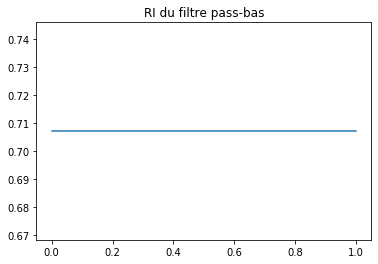

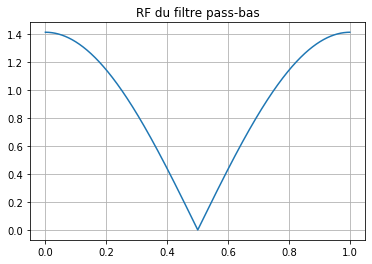

In [5]:
# Create Haar wavelet object
wavelet = pywt.Wavelet('haar')
print(wavelet)

# Low-pass filter vector
wavelet.dec_lo

# Plot impulse response of low-pass filter
plt.figure()
plt.title("RI du filtre pass-bas")
plt.plot(wavelet.dec_lo)
plt.show()

# Get Fourier Transform
fft_wave = np.fft.fft(wavelet.dec_lo,1024)

# Frequency normalization for plots
f = np.linspace(0,1,1024)

# Plot spectrum
plt.figure()
plt.grid()
plt.title("RF du filtre pass-bas")
plt.plot(f,np.abs(fft_wave))
plt.show()

### Exercice 2 : condition de reconstruction parfaite
Vérifier numériquement que la condition de reconstruction parfaite $|\hat{h}(f)|^2+|\hat{h}(f+\frac{1}{2})|^2=2$ est satisfaite par ce filtre.

Remarquer que si on a un signal $h=(h_n)_{n\in\mathbb{Z}}$ le signal $((-1)^nh_n)_{n\in\mathbb{Z}}$ a pour transformée de Fourier à temps discret $\hat{h}(f+\frac{1}{2})$.

On sait par ailleurs, que $\hat{h}(f)=\frac{1}{\sqrt{2}}(1+\exp{(-i 2 \pi f)})$

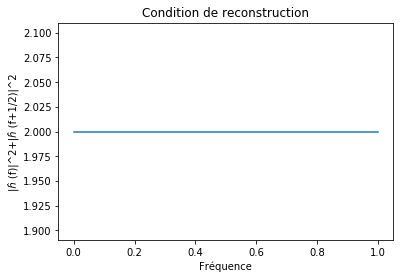

In [9]:
# Construct ((−1)^𝑛ℎ𝑛)
vect = np.zeros_like(wavelet.dec_lo)
vect[::2]= 1
vect[1::2] = -1

# Get new impulse response
wave2  = vect*wavelet.dec_lo

# Get spectrum
fft_wave_2 = np.fft.fft(wave2,1024)

# Condition formula
cond = np.abs(fft_wave)**2 +np.abs(fft_wave_2)**2

# Plot condition function to frequency
plt.figure()
plt.title("Condition de reconstruction")
plt.plot(f,cond)
plt.ylabel("|ℎ̂ (f)|^2+|ℎ̂ (f+1/2)|^2")
plt.xlabel("Fréquence")
plt.show()

### Exercice 3 : observation des ondelettes associées
A l'aide de la fonction wavefun (et en prenant par exemple level=5), générer et tracer la fonction d'échelle $\phi$ et l'ondelette mère $\psi$ associé à l'ondelette de Haar.

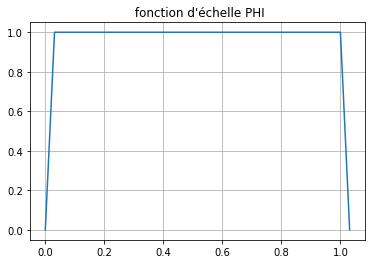

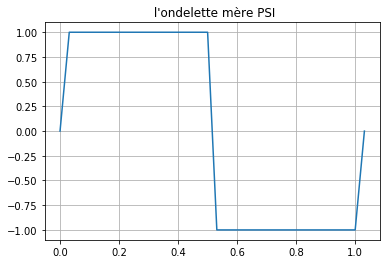

In [10]:
# Using wave function we get PHI and PSY as well as an x axis
phi, psi, x = wavelet.wavefun(level=5)

# Plot PHI
plt.figure()
plt.plot(x,phi)
plt.grid()
plt.title(" fonction d'échelle PHI")
plt.show()

# Plot  PSI
plt.figure()
plt.plot(x,psi)
plt.grid()
plt.title(" l'ondelette mère PSI")
plt.show()

## 4. Ondelettes de Daubechies

### Exercice 4 : Bancs de filtres - Daubechies

A l'aide de la fonction Wavelets de PyWavelets, générer tous les attributs de l'ondelette de Daubechies dont les filtres associés sont de longueur 4.
Extraire la réponse impulsionnelle du filtre passe-bas et la tracer.
Déterminer la réponse fréquentielle de ce filtre en effectuant une fft sur 1024 points de cette réponse impulsionnelle. Représenter graphiquement le module de cette réponse fréquentielle (on prêtera attention à la graduation de l'axe des fréquences).

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


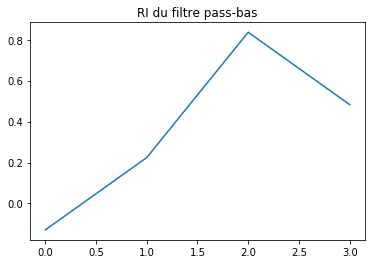

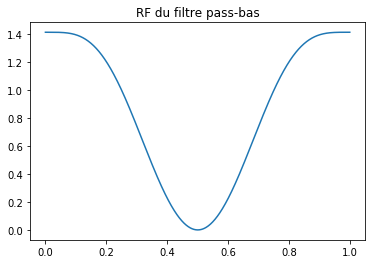

In [15]:
# Create Daubechies wavelet object with filter length 4
wave = pywt.Wavelet('db2')
print(wave)

# Low-pass filter vector
wave.dec_lo

# Plot impulse response of low-pass filter
plt.figure()
plt.title("RI du filtre pass-bas")
plt.plot(wave.dec_lo)
plt.show()

# Get Fourier Transform
fft_db = np.fft.fft(wave.dec_lo,1024)

# Frequency normalization for plots
f = np.linspace(0,1,1024)

# Plot spectrum
plt.figure()
plt.title("RF du filtre pass-bas")
plt.plot(f,np.abs(fft_db))
plt.show()

### Exercice 5 : observation des ondelettes associées
A l'aide de la fonction wavefun (et en prenant par exemple level=5), générer et tracer la fonction d'échelle $\phi$ et l'ondelette mère $\psi$ associé à l'ondelette de Daubechies.

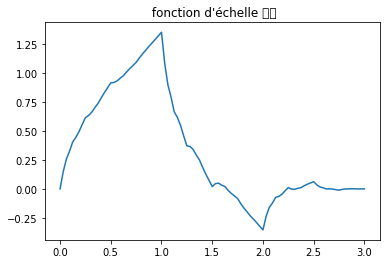

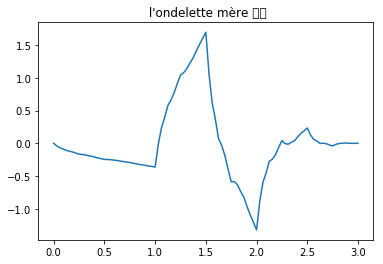

In [16]:
phi_db, psi_db, x = wave.wavefun(level=5)


plt.figure()
plt.plot(x,phi_db)
plt.title(" fonction d'échelle 𝜙")
plt.show()

plt.figure()
plt.plot(x,psi_db)
plt.title(" l'ondelette mère 𝜓")
plt.show()

## 5. Transformée en ondelettes

L'objectif à présent est d'appliquer la transformée en ondelettes à des signaux afin de les analyser. 
On considère donc les signaux linéaires par morceaux définis ci dessous.

256


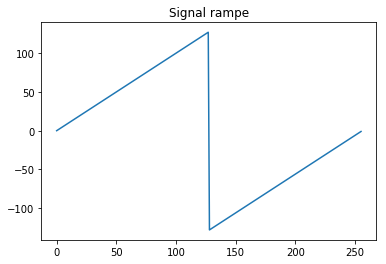

256


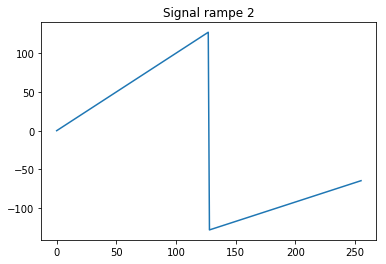

In [17]:
N=256
ramp=np.concatenate((np.arange(0,N/2,1),np.arange(-N/2,0,1)))
print(ramp.size)

plt.figure()
plt.plot(ramp)
plt.title('Signal rampe')
plt.show()

ramp2=np.concatenate((np.arange(0,N/2,1),np.arange(-N/2,-N/4,0.5)))
print(ramp2.size)

plt.figure()
plt.plot(ramp2)
plt.title('Signal rampe 2')
plt.show()

### Exercice 6 : transformée en ondelettes (analyse multirésolution - AMR)

Le but de cet exercice est de calculer la décomposition multirésolution d'un signal test (ramp).
Calculer la décomposition multirésolution du signal ramp test sur jm=1 puis jm=3 niveaux de décomposition (ondelettes db2). Pour cela on utilisera la commande wavedec et on s'assurera de faire des extensions périodiques 
(mode='periodization'). 

1) Observer la manière dont sont stockés les coefficients.

2) Pour visualiser une sous-bande, on pourra écrire une ligne ressemblant à

cA3, cD3, cD2, cD1 = coeffs (à adapter en fonction du nombre de niveau de résolution)

Observer chaque sous-bande de coefficients indépendamment et visualiser les coefficients obtenus conjointement (la fonction concatenate peut s'avérer utile --> np.concatenate((cA3, cD3, cD2, cD1), axis=0)). 

3) Que remarquez-vous ? Comment sont les coefficients obtenus ?

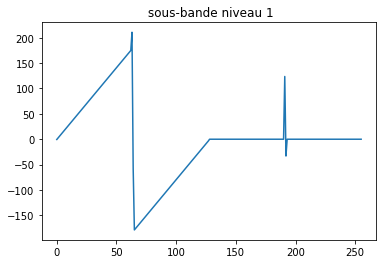

4


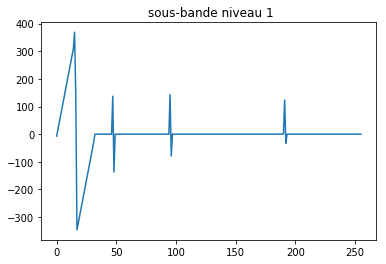

In [31]:
# Get level 1 decomposition of ramp signal with Debauchies wavelet
c1 = pywt.wavedec(ramp,'db2',level=1,mode='periodization')

# Split coefficients
cD2, cD1 = c1

# Concatenate and plot
c1_bandes = np.concatenate(( cD2, cD1), axis=0)

plt.figure()
plt.plot(c1_bandes)
plt.title(" sous-bande niveau 1")
plt.show()

# Get level 3 decomposition of ramp signal with Debauchies wavelet
c3 = pywt.wavedec(ramp,wave,level=3, mode='periodization')

# Split coefficients
cA3, cD3, cD2, cD1 = c3

# Concatenate and plot
c3_bandes = np.concatenate(( cA3, cD3, cD2, cD1), axis=0)


plt.figure()
plt.plot(c3_bandes)
plt.title(" sous-bande niveau 1")
plt.show()


### Exercice 7 : reconctruction parfaite
Vérifier que l'on a bien reconstruction parfaite en affichant l'erreur de reconstruction c'est à dire l'erreur entre le signal original ramp et le signal obtenu après reconstruction de ces coefficients de décomposition.

In [41]:
# Signal reconstruction
c = pywt.wavedec(ramp,'db2',level=1,mode='periodization')
cA, cD = c

rec1 = pywt.waverec(c, 'db2',mode='periodization' )

# Calculate Quadratic error
error1 = np.abs(rec1 - ramp)**2

# Repeat for level 3 reconstruction and print errors

rec2 =  pywt.waverec(c3, 'db2', mode='periodization')

error3 = np.abs(rec2 - ramp)**2

print("Erreur quadratic moyenne , niveau 1:" , np.mean(error1) )
print("Erreur quadratic moyenne , niveau 3:" , np.mean(error3) )

Erreur quadratic moyenne , niveau 1: 1.4028743625877137e-28
Erreur quadratic moyenne , niveau 3: 4.950090656860542e-28


### Exercice 8  : Analyse du signal à ramp 2

Le but de cet exercice est de calculer la décomposition multirésolution d'un signal test (ramp2).
Calculer la décomposition multirésolution du signal ramp2 test jm=3 niveaux de décomposition (ondelettes db2). Pour cela on utilisera la commande wavedec et on s'assurera de faire des extensions périodiques 
(mode='periodization'). 

1) Observer chaque sous-bande de coefficients indépendamment et visualiser les coefficients obtenus conjointement (la fonction concatenate peut s'avérer utile). 

2) Que remarquez-vous ? Comment sont les coefficients obtenus ? Que se passe t'il au bord des coefficients ? Pourquoi ?


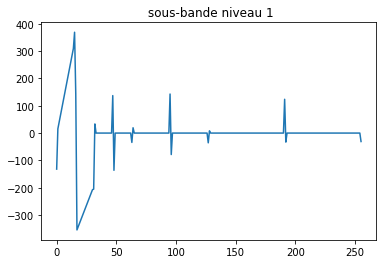

In [42]:
c3 = pywt.wavedec(ramp2,wave,level=3, mode='periodization')


cA3, cD3, cD2, cD1 = c3

c3_bandes = np.concatenate(( cA3, cD3, cD2, cD1), axis=0)


plt.figure()
plt.plot(c3_bandes)
plt.title(" sous-bande niveau 1")
plt.show()


### Exercice 9 : reconctruction parfaite
Vérifier que l'on a bien reconstruction parfaite en affichant l'erreur de reconstruction c'est à dire l'erreur entre le signal original ramp2 et le signal obtenu après reconstruction de ces coefficients de décomposition.

In [43]:
c = pywt.wavedec(ramp2,'db2',level=1,mode='periodization')
cA, cD = c

rec1 = pywt.waverec(c, 'db2',mode='periodization' )

error1 = np.abs(rec1 - ramp2)**2


rec2 =  pywt.waverec(c3, 'db2', mode='periodization')

error3 = np.abs(rec2 - ramp2)**2

print("Erreur quadratic moyenne , niveau 1:" , np.mean(error1) )
print("Erreur quadratic moyenne , niveau 3:" , np.mean(error3) )

Erreur quadratic moyenne , niveau 1: 1.5444494447227897e-28
Erreur quadratic moyenne , niveau 3: 8.146652849878897e-28
